<a href="https://colab.research.google.com/github/OliverMaerz/Covid19/blob/master/Covid19_Compare_Argentina_curve_to_Italy%2C_Spain_and_Germany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid 19 / Corona Virus Comparison  between Argentina and Italy/Spain/Germany
Generated with data the Johns Hopkins CSSE: https://github.com/CSSEGISandData


Download the Johns Hopkins CSSE global dataset for confirmed Covid19 cases. 


In [14]:
!wget -O covid19_confirmed_global.csv https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
# !wget -O covid19_deaths_global.csv https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv
# !wget -O covid19_recovered_global.csv https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv
!ls -al

--2020-04-13 20:34:19--  https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67420 (66K) [text/plain]
Saving to: ‘covid19_confirmed_global.csv’

covid19_confirmed_g 100%[===================>]  65.84K  --.-KB/s    in 0.02s   

2020-04-13 20:34:19 (2.60 MB/s) - ‘covid19_confirmed_global.csv’ saved [67420/67420]

total 84
drwxr-xr-x 1 root root  4096 Apr 13 20:16 .
drwxr-xr-x 1 root root  4096 Apr 13 20:12 ..
drwxr-xr-x 1 root root  4096 Apr  9 16:10 .config
-rw-r--r-- 1 root root 67420 Apr 13 20:34 covid19_confirmed_global.csv
drwxr-xr-x 1 root root  4096 Apr  3 16:24 sample_data


Import the libraries we will use for process and to plot the data

In [0]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [30, 15]
import numpy as np
import pandas as pd

Load the downloaded dataset (csv file) into a Pandas dataframe and remove columns we will not use

In [19]:
confirmed_df = pd.read_csv('covid19_confirmed_global.csv', sep=',', header=0, error_bad_lines=False)
confirmed_df = confirmed_df.drop(['Lat', 'Long', 'Province/State'], axis=1)
confirmed_df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607
1,Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446
2,Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914
3,Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,France,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
260,South Sudan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,3,4,4,4
261,Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4,6
262,Sao Tome and Principe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,4,4,4,4,4


Create a new dataframe with just the countries that we want to look at  

In [20]:
selected_countries_df = confirmed_df.loc[(confirmed_df['Country/Region'] == 'Argentina') | (confirmed_df['Country/Region'] == 'Spain') | (confirmed_df['Country/Region'] == 'Italy') | (confirmed_df['Country/Region'] == 'Germany')]
selected_countries_df = selected_countries_df.set_index('Country/Region')
selected_countries_df


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Argentina,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,8,12,12,17,19,19,31,34,45,56,68,79,97,128,158,266,301,387,387,502,589,690,745,820,1054,1054,1133,1265,1451,1451,1554,1628,1715,1795,1975,1975,2142
Germany,0,0,0,0,0,1,4,4,4,5,8,10,12,12,12,12,13,13,14,14,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,27,46,48,79,130,...,262,482,670,799,1040,1176,1457,1908,2078,3675,4585,5795,7272,9257,12327,15320,19848,22213,24873,29056,32986,37323,43938,50871,57695,62095,66885,71808,77872,84794,91159,96092,100123,103374,107663,113296,118181,122171,124908,127854
Italy,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,20,62,155,229,322,453,655,888,1128,1694,...,3089,3858,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138,63927,69176,74386,80589,86498,92472,97689,101739,105792,110574,115242,119827,124632,128948,132547,135586,139422,143626,147577,152271,156363
Spain,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,6,13,15,32,45,84,...,222,259,400,500,673,1073,1695,2277,2277,5232,6391,7798,9942,11748,13910,17963,20410,25374,28768,35136,39885,49515,57786,65719,73235,80110,87956,95923,104118,112065,119199,126168,131646,136675,141942,148220,153222,158273,163027,166831


Check how many columns with data we have

In [21]:
num_cols_all = selected_countries_df.count(axis='columns')
cols = num_cols_all['Argentina']
cols

82

Shift some of the rows so we can better compare the growth of the curves. The idea is to shift the rows so that the day of the first reported virus case is aligned for the different countries. Dates will no longer match, so we replace them with number of days in the next step. 

In [39]:
shifted_df = selected_countries_df.copy()
shifted_df.loc['Argentina'] = shifted_df.loc['Argentina'].shift(-36)
shifted_df.loc['Italy'] = shifted_df.loc['Italy'].shift(-4)
shifted_df.loc['Spain'] = shifted_df.loc['Spain'].shift(-5)
shifted_df

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Argentina,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,8.0,12.0,12.0,17.0,19.0,19.0,31.0,34.0,45.0,56.0,68.0,79.0,97.0,128.0,158.0,266.0,301.0,387.0,387.0,502.0,589.0,690.0,745.0,820.0,1054.0,1054.0,1133.0,1265.0,1451.0,1451.0,1554.0,...,1795.0,1975.0,1975.0,2142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Germany,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,5.0,8.0,10.0,12.0,12.0,12.0,12.0,13.0,13.0,14.0,14.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,17.0,27.0,46.0,48.0,79.0,130.0,...,262.0,482.0,670.0,799.0,1040.0,1176.0,1457.0,1908.0,2078.0,3675.0,4585.0,5795.0,7272.0,9257.0,12327.0,15320.0,19848.0,22213.0,24873.0,29056.0,32986.0,37323.0,43938.0,50871.0,57695.0,62095.0,66885.0,71808.0,77872.0,84794.0,91159.0,96092.0,100123.0,103374.0,107663.0,113296.0,118181.0,122171.0,124908.0,127854.0
Italy,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,20.0,62.0,155.0,229.0,322.0,453.0,655.0,888.0,1128.0,1694.0,2036.0,2502.0,3089.0,3858.0,...,7375.0,9172.0,10149.0,12462.0,12462.0,17660.0,21157.0,24747.0,27980.0,31506.0,35713.0,41035.0,47021.0,53578.0,59138.0,63927.0,69176.0,74386.0,80589.0,86498.0,92472.0,97689.0,101739.0,105792.0,110574.0,115242.0,119827.0,124632.0,128948.0,132547.0,135586.0,139422.0,143626.0,147577.0,152271.0,156363.0,NaN,NaN,NaN,NaN
Spain,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,13.0,15.0,32.0,45.0,84.0,120.0,165.0,222.0,259.0,400.0,...,1073.0,1695.0,2277.0,2277.0,5232.0,6391.0,7798.0,9942.0,11748.0,13910.0,17963.0,20410.0,25374.0,28768.0,35136.0,39885.0,49515.0,57786.0,65719.0,73235.0,80110.0,87956.0,95923.0,104118.0,112065.0,119199.0,126168.0,131646.0,136675.0,141942.0,148220.0,153222.0,158273.0,163027.0,166831.0,NaN,NaN,NaN,NaN,NaN


Remove the first columns with zero values and the right columns that do not have values in all rows.

In [40]:
# remove the first 5 columns with zero values 
first_empty_columns = 5
shifted_df = shifted_df.iloc[:, first_empty_columns:cols-36]
# remove the dates with number of days, as dates longer match
shifted_df.columns = range(cols-36-first_empty_columns)
shifted_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Argentina,1.0,1.0,1.0,2.0,8.0,12.0,12.0,17.0,19.0,19.0,31.0,34.0,45.0,56.0,68.0,79.0,97.0,128.0,158.0,266.0,301.0,387.0,387.0,502.0,589.0,690.0,745.0,820.0,1054.0,1054.0,1133.0,1265.0,1451.0,1451.0,1554.0,1628.0,1715.0,1795.0,1975.0,1975.0,2142.0
Germany,1.0,4.0,4.0,4.0,5.0,8.0,10.0,12.0,12.0,12.0,12.0,13.0,13.0,14.0,14.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,16.0,17.0,27.0,46.0,48.0,79.0,130.0,159.0,196.0,262.0,482.0,670.0,799.0
Italy,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,20.0,62.0,155.0,229.0,322.0,453.0,655.0,888.0,1128.0,1694.0,2036.0,2502.0,3089.0,3858.0,4636.0,5883.0,7375.0,9172.0,10149.0,12462.0
Spain,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,13.0,15.0,32.0,45.0,84.0,120.0,165.0,222.0,259.0,400.0,500.0,673.0,1073.0,1695.0,2277.0,2277.0


Transpose the dataframe (swich rows with columns)

In [41]:
shifted_df = shifted_df.transpose()
shifted_df

Country/Region,Argentina,Germany,Italy,Spain
0,1.0,1.0,2.0,1.0
1,1.0,4.0,2.0,1.0
2,1.0,4.0,2.0,1.0
3,2.0,4.0,2.0,1.0
4,8.0,5.0,2.0,1.0
5,12.0,8.0,2.0,1.0
6,12.0,10.0,2.0,1.0
7,17.0,12.0,3.0,1.0
8,19.0,12.0,3.0,2.0
9,19.0,12.0,3.0,2.0


## Plot the curve. Y axis has logarithmic scale.

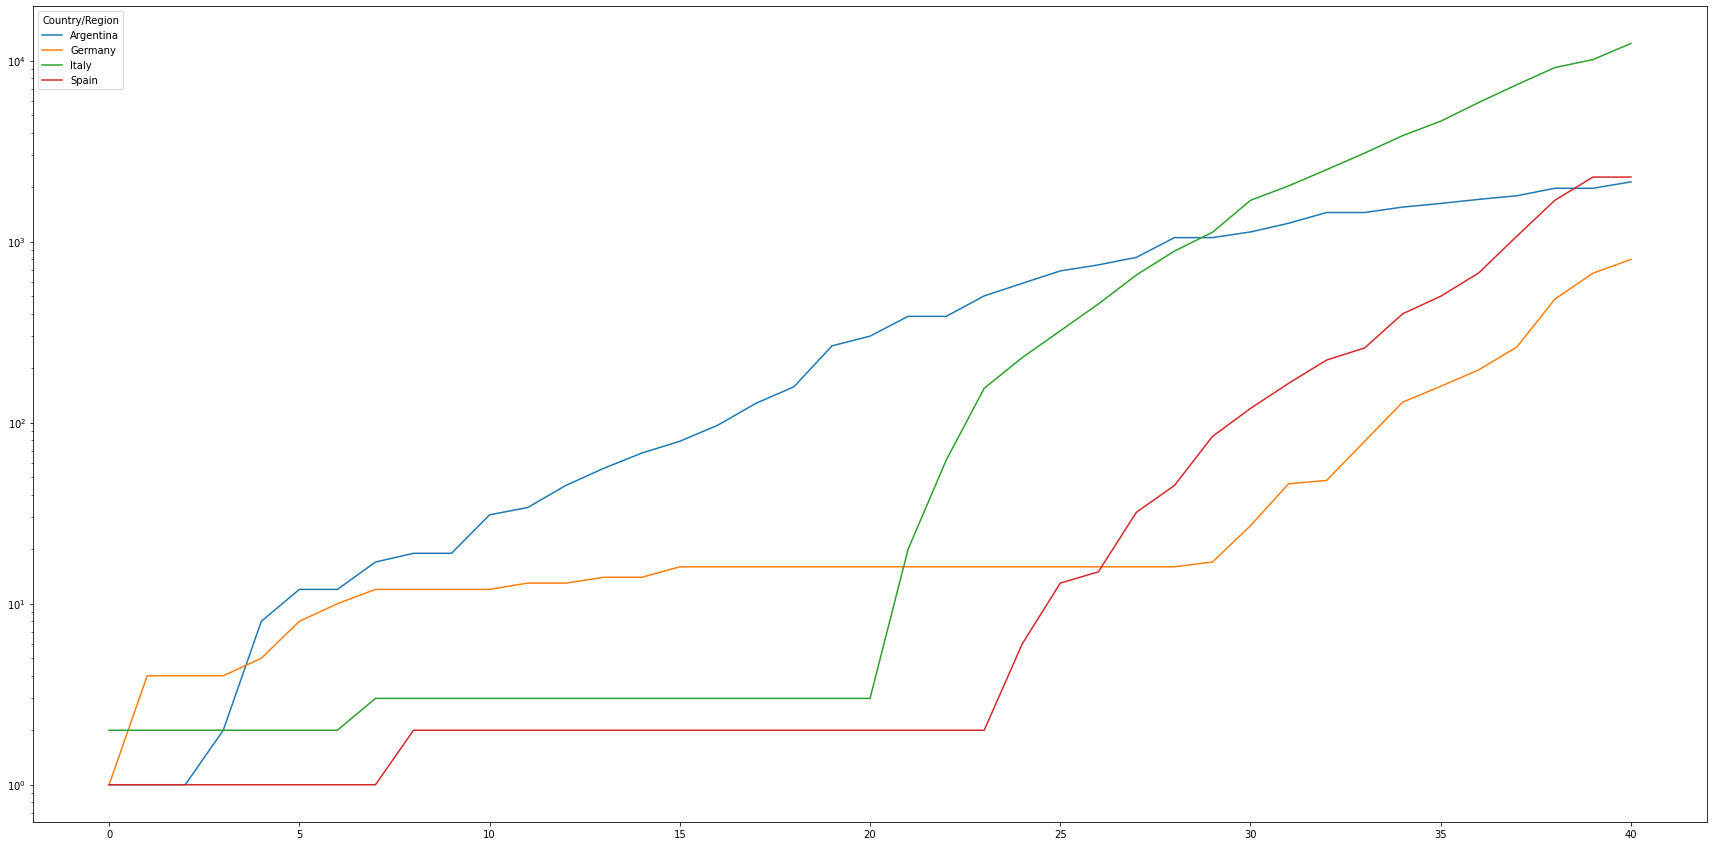

In [90]:
shifted_df.plot(kind='line', title='Curves synced when first case was reported. Y axis has logarithmic scale.', logy=True)

Now plot the same curves but shift them so they align where each country reaches a minimum of 45 cases. Y axis has logarithmic scale.

In [0]:
def get_shifted_curves(df, columns, shift_values, remove_first_x):
    min_shift = 0
    shifted_df = df.copy()
    for country in shift_values:
        min_shift = min(min_shift, shift_values[country])
        shifted_df.loc[country] = shifted_df.loc[country].shift(shift_values[country])    

    # remove the first x columns with zero values 
    shifted_df = shifted_df.iloc[:, remove_first_x:columns + min_shift]
    # remove the dates with number of days, as dates longer match
    shifted_df.columns = range(columns + min_shift - remove_first_x)
    shifted_df = shifted_df.transpose()
    return shifted_df

In [87]:
shifts = {'Argentina': -16, 'Spain': -1, 'Italy': 6}
first_empty_rows = 25

shifted_45_cases_df = get_shifted_curves(selected_countries_df, cols, shifts, first_empty_rows)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(shifted_45_cases_df)

Country/Region  Argentina  Germany    Italy    Spain
0                     1.0     16.0      3.0      2.0
1                     1.0     16.0      3.0      2.0
2                     1.0     16.0      3.0      2.0
3                     2.0     16.0      3.0      2.0
4                     8.0     16.0      3.0      2.0
5                    12.0     16.0      3.0      2.0
6                    12.0     16.0      3.0      2.0
7                    17.0     16.0      3.0      2.0
8                    19.0     16.0      3.0      6.0
9                    19.0     17.0      3.0     13.0
10                   31.0     27.0      3.0     15.0
11                   34.0     46.0     20.0     32.0
12                   45.0     48.0     62.0     45.0
13                   56.0     79.0    155.0     84.0
14                   68.0    130.0    229.0    120.0
15                   79.0    159.0    322.0    165.0
16                   97.0    196.0    453.0    222.0
17                  128.0    262.0    655.0   

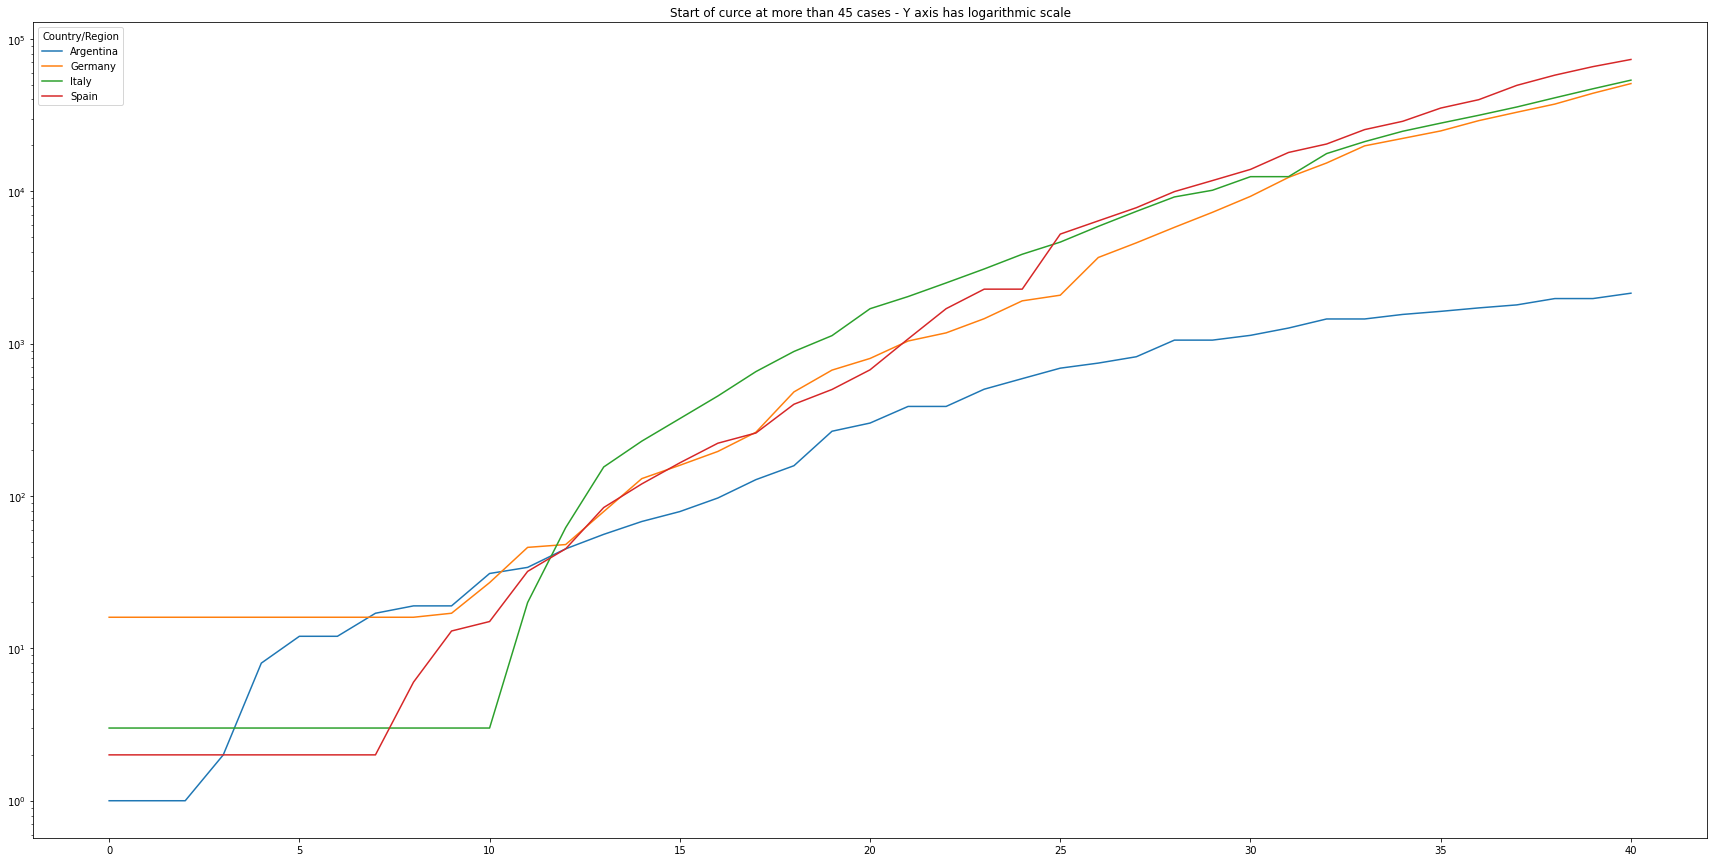

In [89]:
shifted_45_cases_df.plot(kind='line', title='Start of curce at more than 45 cases - Y axis has logarithmic scale', logy=True)

Now do the same with but align where more than 100 cases are reached (Y axis has logarithmic scale):

In [79]:
shifts = {'Argentina': -19, 'Spain': -1, 'Italy': 7}
first_empty_rows = 22

shifted_100_cases_df = get_shifted_curves(selected_countries_df, cols, shifts, first_empty_rows)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(shifted_100_cases_df)

Country/Region  Argentina  Germany    Italy    Spain
0                     1.0     16.0      2.0      2.0
1                     1.0     16.0      3.0      2.0
2                     1.0     16.0      3.0      2.0
3                     2.0     16.0      3.0      2.0
4                     8.0     16.0      3.0      2.0
5                    12.0     16.0      3.0      2.0
6                    12.0     16.0      3.0      2.0
7                    17.0     16.0      3.0      2.0
8                    19.0     16.0      3.0      2.0
9                    19.0     16.0      3.0      2.0
10                   31.0     16.0      3.0      2.0
11                   34.0     16.0      3.0      6.0
12                   45.0     17.0      3.0     13.0
13                   56.0     27.0      3.0     15.0
14                   68.0     46.0      3.0     32.0
15                   79.0     48.0     20.0     45.0
16                   97.0     79.0     62.0     84.0
17                  128.0    130.0    155.0   

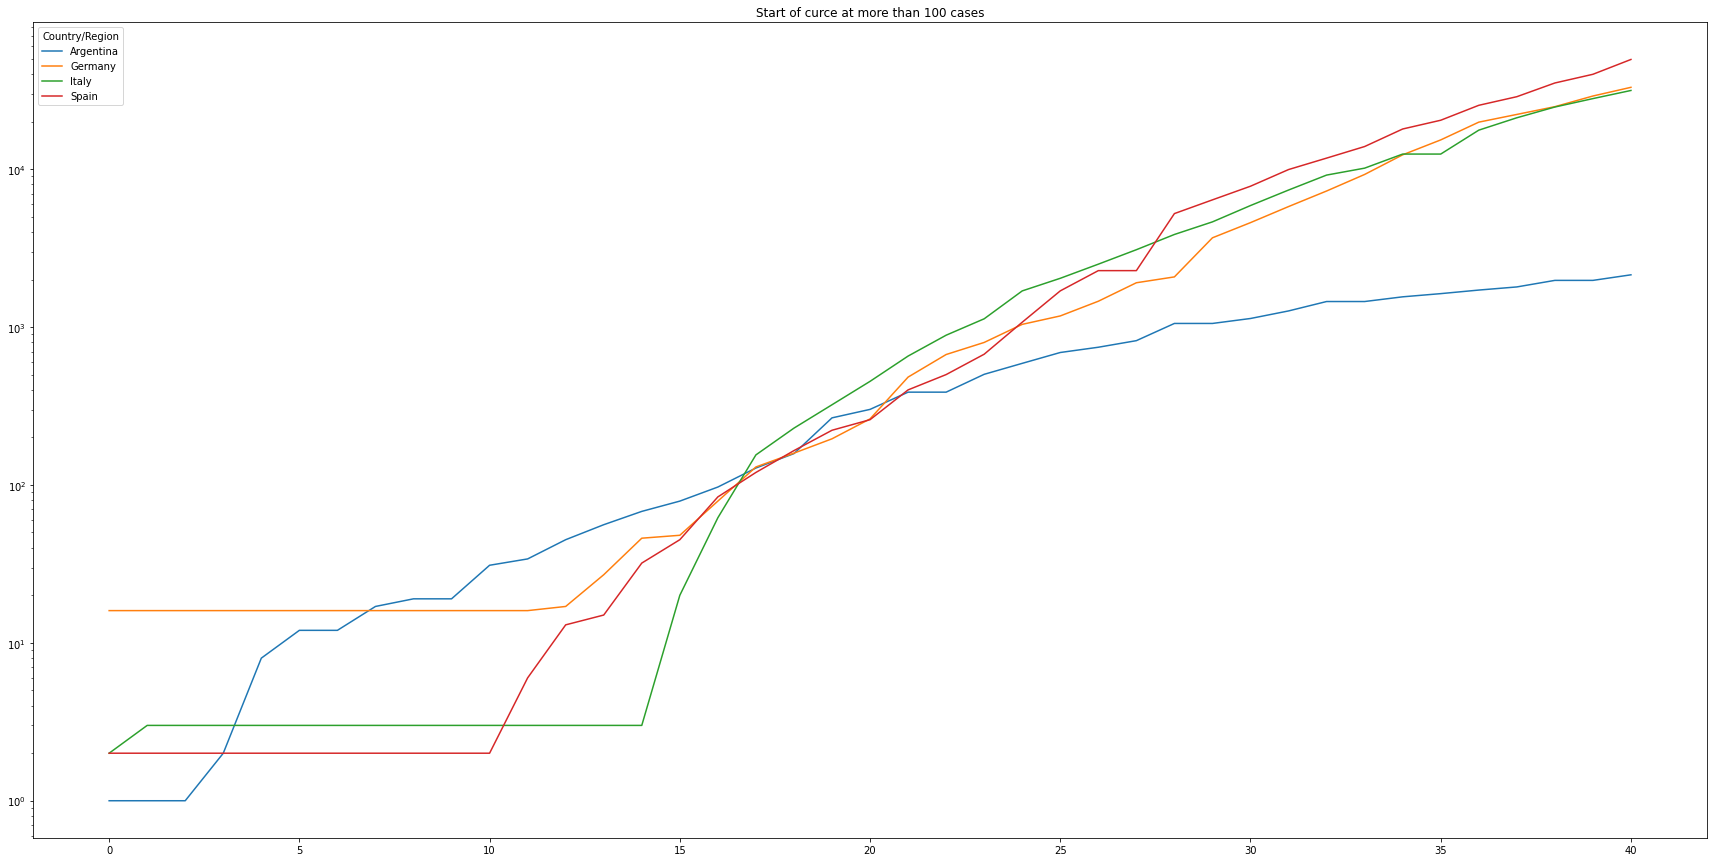

In [85]:

shifted_100_cases_df.plot(kind='line', title='Start of curce at more than 100 cases - Y axis has logarithmic scale', logy=True)